# Netflix TV Shows & Movies - Overview

## Set Up Environment

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in CSV file into a pandas dataframe.
netflix = pd.read_csv('data/netflix_titles.csv', index_col='show_id')
netflix.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Inspect and Clean Data

In [3]:
# This dataset has 7,787 rows and 11 columns.
netflix.shape

(7787, 11)

In [4]:
# Datatypes: 1 integer, 10 objects; 5 columns have null values.
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


In [5]:
netflix.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,Movie,Death at a Funeral,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [6]:
# All entries are either a tv show or a movie.
netflix.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [7]:
netflix.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
# Duration is comes in 2 different measures: seasons and minutes.
netflix.duration.unique()[:5]

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min'], dtype=object)

In [9]:
# Entries for 'listed_in' can have more than one value.
netflix.listed_in.unique()[:5]

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas'], dtype=object)

In [10]:
netflix.country.unique()[:5]

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey'],
      dtype=object)

In [11]:
# There are no duplicate rows in this dataset.
sum(netflix.duplicated())

0

In [12]:
# Replace null values with 'Unknown' for text columns.
na_fill_cols = ['director', 'cast', 'country', 'rating']
for col in na_fill_cols:
    netflix[col].fillna('Unknown', inplace=True)

In [13]:
# Convert date_added to a datetime object.
netflix['date_added'] = pd.to_datetime(netflix.date_added)

### Description
This dataset consists of 7,787 TV shows and movies available on Netflix, globally, with release years spanning from 1925-2021.  The columns are as follows:
- show_id: The unique identifier for the show/movie.  I used this as the index.
- type: Whether it is a TV show or a movie.
- title: The name of the show/movie.
- director: A list of directors of the show/movie.
- cast: A list of cast members in the show/movie.
- country: A list of the countries where the show/movie is available.
- date_added: The date the show/movie became available on Netflix.
- release_year: The year the show/movie was released.
- rating: The rating of the show/movie based on level of maturity of content and language.
- duration: The number of seasons the show lasted or the movie in minutes.
- listed_in: A list of the genres the show/movie belongs to.
- description: A text description of the show/movie.

### Possible Analyses with this Dataset
#### Overview
1. Change in number of shows/movies available over time.
2. Proportion of shows vs movies.
3. Number of directors, cast members, countries available, and genres.
4. Average lengths for movies and tenure for shows.
5. Most and least common countries, genres, ratings, directors, and cast members.

#### Deep Dive
6. Length of cast by country.
7. Proportion of shows vs movies by country.
8. Range of directors in terms of number of countries.
9. Average movie length by genre and country.
10. TV show tenure by genre.
11. Deeper dive into specific regions (e.g. Africa).

#### Natural Language Processing
12. Most common words in descriptions overall and by genre.

## Analysis: Overview

### 1. Change in number of shows/movies available over time.

In [14]:
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [15]:
# Extract year from 'date_added' column.
netflix['year_added'] = netflix.date_added.dt.year.astype('int', errors='ignore')

In [16]:
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
show_id,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0


In [17]:
# Frequency distribution by the new 'year_added' column.
new_content_by_year = netflix.pivot_table(index='year_added', aggfunc=np.count_nonzero).title
new_content_by_year

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      25
2015.0      88
2016.0     443
2017.0    1225
2018.0    1685
2019.0    2153
2020.0    2009
2021.0     117
Name: title, dtype: int64

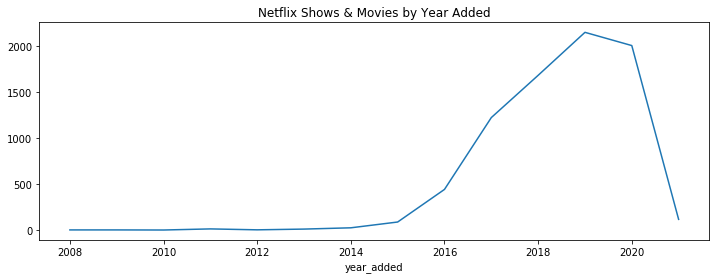

In [18]:
new_content_by_year.plot(figsize=(12,4), title='Netflix Shows & Movies by Year Added')

### 2. Proportion of shows vs movies.

In [19]:
netflix.type.value_counts(normalize=True) * 100

Movie      69.050982
TV Show    30.949018
Name: type, dtype: float64

### 3. Number of directors, cast members, countries available, and genres.

In [20]:
netflix.country.tail(3)

show_id
s7785                                  Unknown
s7786                                Australia
s7787    United Kingdom, Canada, United States
Name: country, dtype: object

In [21]:
def convert_to_list(text):
    if ',' not in text:
        return [text]
    else:
        converted_text = text.split(',')
        for x in converted_text:
            converted_text[converted_text.index(x)] = x.strip()
        return converted_text
    
# convert_to_list('Brazil')
convert_to_list('Brazil, Argentina, Peru')

['Brazil', 'Argentina', 'Peru']

In [22]:
# Take the columns with multiple possible values and present them in list format in new columns.
list_columns = ['director', 'cast', 'country', 'listed_in']
for col in list_columns:
    netflix['{}_list'.format(col)] = netflix[col].apply(convert_to_list)

netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list
show_id,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ..."
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]"


In [23]:
# Use new list-format columns to count how many each have and save in new size columns.
new_list_columns = ['director_list', 'cast_list', 'country_list', 'listed_in_list']
for col in new_list_columns:
    netflix['{}_size'.format(col)] = netflix[col].apply(lambda x: len(x))
netflix.rename(columns={
    'director_list_size': 'director_size',
    'cast_list_size': 'cast_size',
    'country_list_size': 'country_size',
    'listed_in_list_size': 'listed_in_size'
}, inplace=True)
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",1,11,1,3
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]",1,6,1,2


In [24]:
# Frequency distribution for new 'director_size' column.
round(netflix.director_size.value_counts(normalize=True) * 100, 2)

1     92.90
2      6.32
3      0.41
4      0.17
5      0.06
10     0.04
11     0.03
12     0.03
7      0.01
13     0.01
9      0.01
8      0.01
Name: director_size, dtype: float64

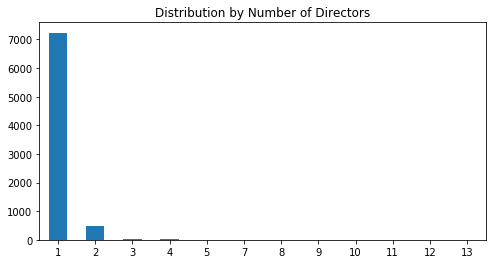

In [25]:
netflix.director_size.value_counts()[[1,2,3,4,5,7,8,9,10,11,12,13]].plot.bar(figsize=(8,4), rot=0, title='Distribution by Number of Directors')

In [26]:
# Frequency distribution for new 'cast_size' column.
round(netflix.cast_size.value_counts(normalize=True) * 100, 2)

1     19.85
10    15.90
8     13.59
9      8.01
6      7.44
7      6.75
11     5.14
5      4.29
12     3.24
4      3.17
2      2.38
3      2.18
13     2.00
14     1.35
15     1.35
16     0.83
17     0.46
18     0.44
20     0.30
19     0.28
21     0.14
22     0.12
24     0.09
23     0.09
25     0.09
26     0.08
28     0.08
27     0.04
47     0.04
33     0.04
34     0.04
38     0.03
40     0.03
41     0.03
39     0.03
50     0.03
30     0.03
29     0.01
44     0.01
32     0.01
31     0.01
42     0.01
Name: cast_size, dtype: float64

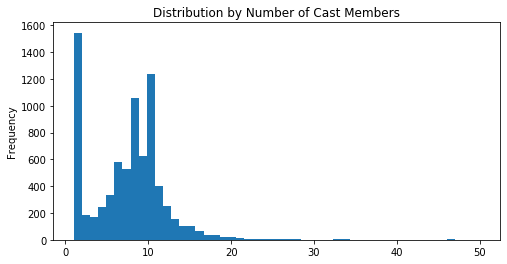

In [27]:
netflix.cast_size.plot.hist(figsize=(8,4), bins=50, title='Distribution by Number of Cast Members')

In [28]:
# Frequency distribution for new 'country_size' column.
round(netflix.country_size.value_counts(normalize=True) * 100, 2)

1     85.19
2      9.80
3      3.08
4      1.22
5      0.42
6      0.18
7      0.06
10     0.01
12     0.01
8      0.01
Name: country_size, dtype: float64

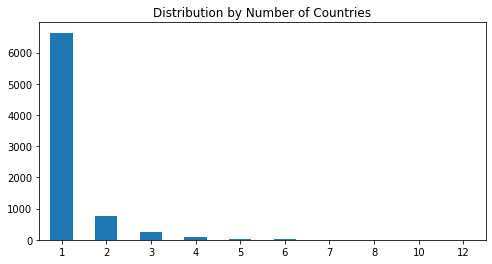

In [29]:
netflix.country_size.value_counts()[[1,2,3,4,5,6,7,8,10,12]].plot.bar(figsize=(8,4), rot=0, title='Distribution by Number of Countries')

In [30]:
# Frequency distribution for new 'listed_in_size' column.
round(netflix.listed_in_size.value_counts(normalize=True) * 100)

3    42.0
2    35.0
1    23.0
Name: listed_in_size, dtype: float64

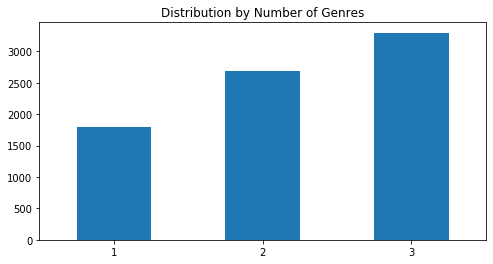

In [31]:
netflix.listed_in_size.value_counts()[[1,2,3]].plot.bar(figsize=(8,4), rot=0, title='Distribution by Number of Genres')

### 4. Average lengths for movies and tenure for shows.

In [32]:
netflix.duration.head()

show_id
s1    4 Seasons
s2       93 min
s3       78 min
s4       80 min
s5      123 min
Name: duration, dtype: object

In [33]:
# Split netflix dataframe into 2 new ones: 1 for tv shows, 1 for movies.
tv_shows = netflix[netflix.type == 'TV Show'].copy()
movies = netflix[netflix.type == 'Movie'].copy()

In [34]:
# Frequency distribution of tv seasons.
season_dist = pd.DataFrame(tv_shows.duration.value_counts())
season_dist['duration_pct'] = round(season_dist.duration / season_dist.duration.sum() * 100, 2)
season_dist.rename(columns={'duration': 'freq', 'duration_pct': 'percent'}, inplace=True)
season_dist

,freq,percent
1 Season,1608,66.72
2 Seasons,382,15.85
3 Seasons,184,7.63
4 Seasons,87,3.61
5 Seasons,58,2.41
6 Seasons,30,1.24
7 Seasons,19,0.79
8 Seasons,18,0.75
9 Seasons,8,0.33
10 Seasons,6,0.25


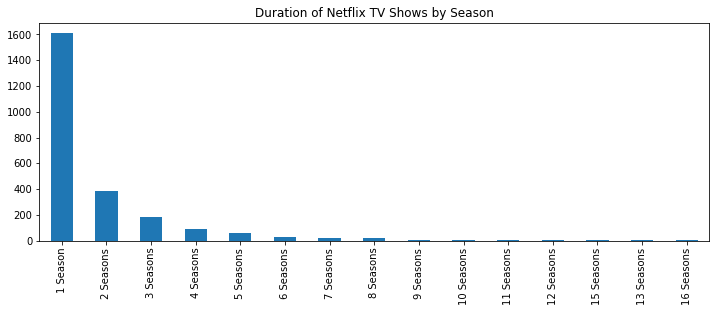

In [35]:
season_dist.freq.plot.bar(figsize=(12,4), title='Duration of Netflix TV Shows by Season')

In [36]:
# Convert 'durtion' column into an integer.
movies['duration'] = movies.duration.str.replace(' min', '').astype('int')
movies.duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

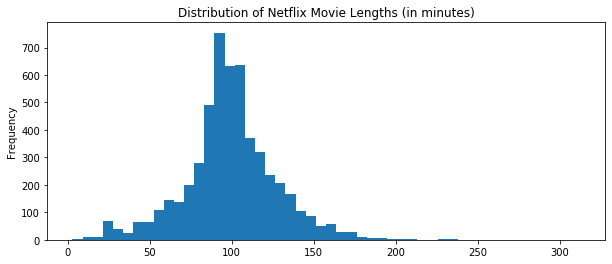

In [37]:
# The distribution of movie lengths is close to normal.
movies.duration.plot.hist(figsize=(10,4), bins=50, title='Distribution of Netflix Movie Lengths (in minutes)')

### 5. Most and least common countries, genres, ratings, directors, and cast members.

In [38]:
netflix.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",1,11,1,3
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]",1,6,1,2


In [39]:
# This function creates a list-format column and generates a frequency distribution for it.
def plot_freq_dist(df, col, category, num=50, highest=True, drop_unknown=False):
    frequencies = {}
    for entry in list(df[col]):
        for x in entry:
            if x not in frequencies:
                frequencies[x] = 1
            else:
                frequencies[x] += 1
    
    freq_dist = pd.DataFrame(pd.Series(frequencies), columns=['freq'])
    freq_dist['percent'] = freq_dist.freq / freq_dist.freq.sum() * 100
    freq_dist.sort_values(by='freq', ascending=highest, inplace=True)
    
    if drop_unknown:
        freq_dist.drop(index='Unknown', inplace=True)
    
    freq_dist[-num:].freq.plot.barh(figsize=(12,len(freq_dist[-num:])*.25), title='{} Distribution on Netflix'.format(category.title()))

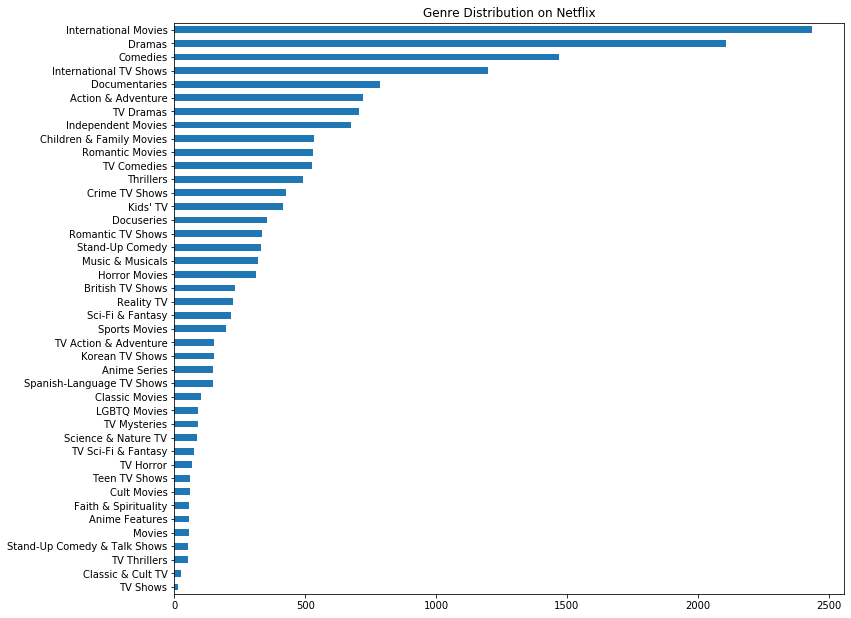

In [40]:
plot_freq_dist(netflix, 'listed_in_list', 'genre', 50)

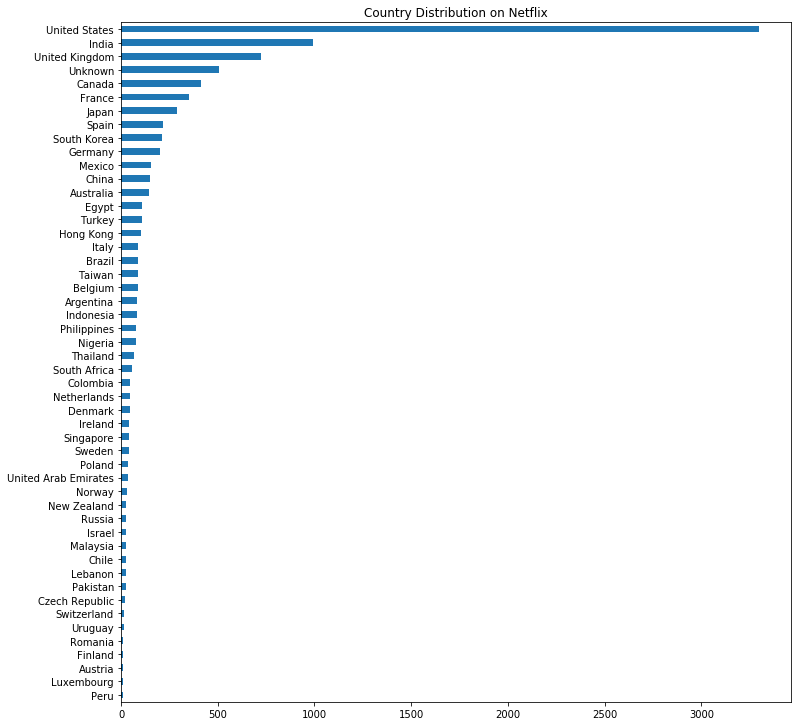

In [41]:
plot_freq_dist(netflix, 'country_list', 'country', 50)
# plot_freq_dist(netflix, 'country_list', 'country', 50, highest=False)

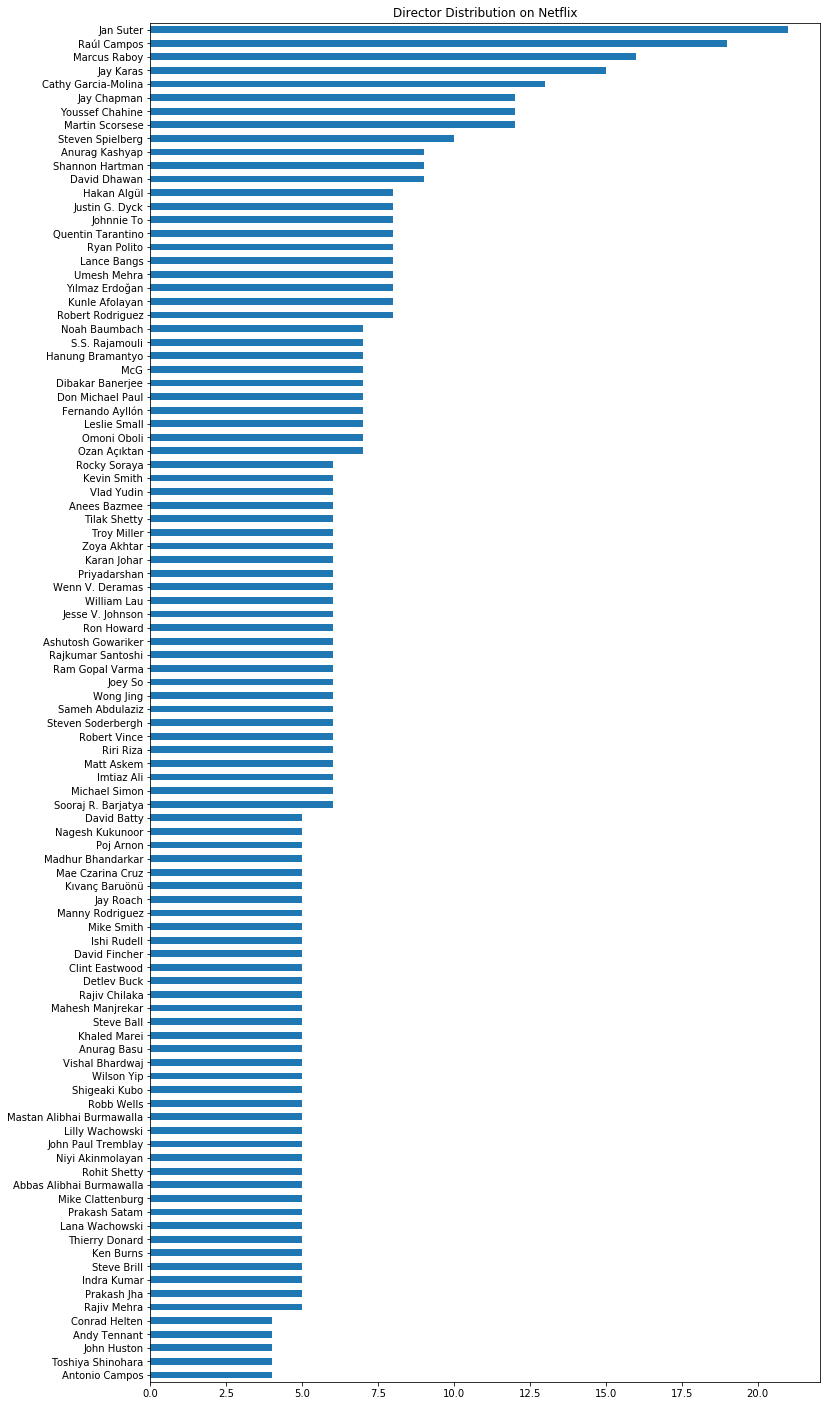

In [42]:
plot_freq_dist(netflix, 'director_list', 'director', 100, drop_unknown=True)

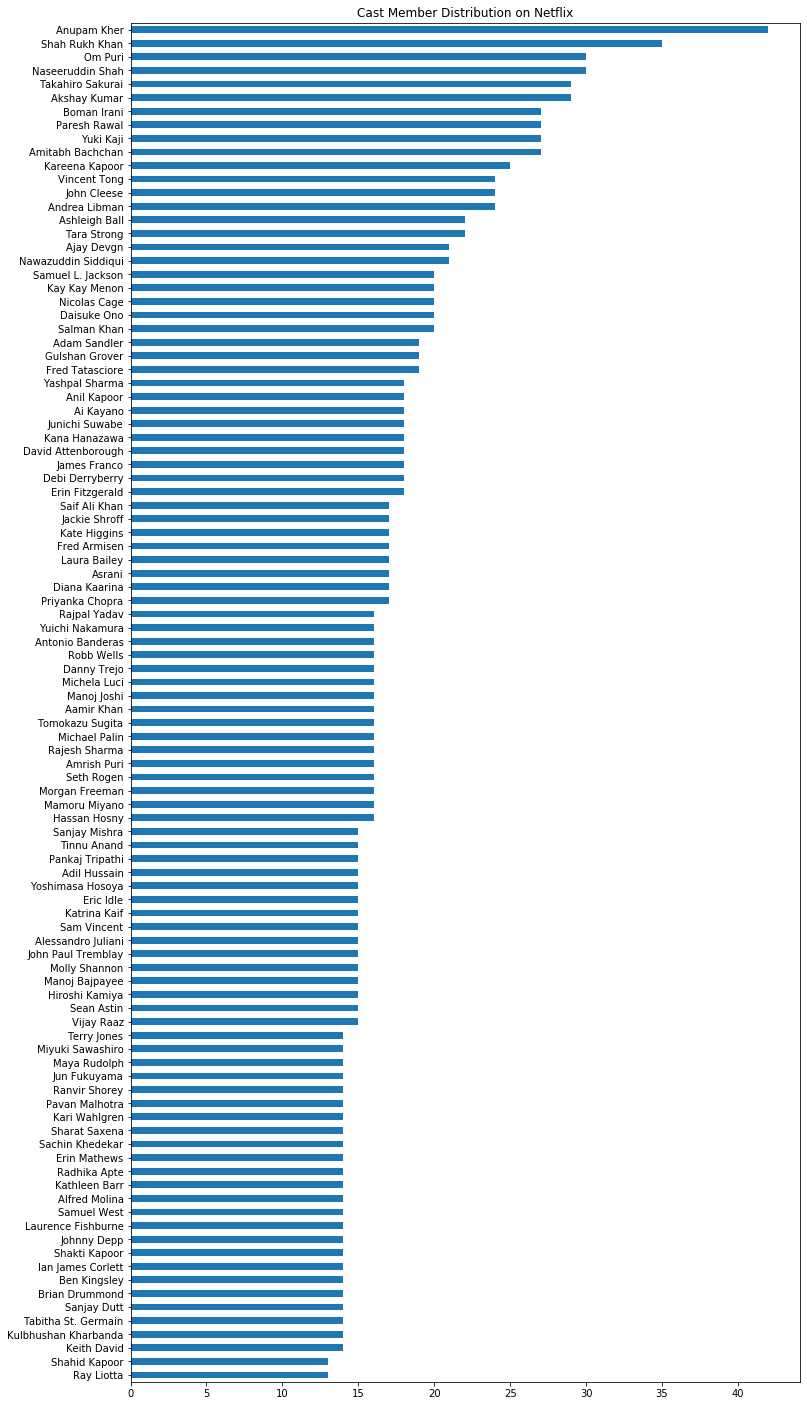

In [43]:
plot_freq_dist(netflix, 'cast_list', 'cast member', 100, drop_unknown=True)

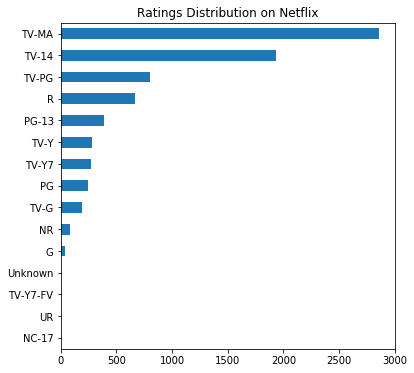

In [44]:
netflix.rating.value_counts(ascending=True).plot.barh(figsize=(6,6), title='Ratings Distribution on Netflix')

## Analysis: Deep Dive

### 6. Length of cast by country.

In [45]:
netflix[['country','cast_size']]

,country,cast_size
show_id,,
s1,Brazil,11
s2,Mexico,6
s3,Singapore,9
s4,United States,9
s5,United States,12
...,...,...
s7783,"Sweden, Czech Republic, United Kingdom, Denmar...",7
s7784,India,8
s7785,Unknown,1


In [46]:
# Create a unique list of countries.
countries_list = []
for entry in list(netflix.country_list):
    for x in entry:
        if x not in countries_list:
            countries_list.append(x)

countries_list

['Brazil',
 'Mexico',
 'Singapore',
 'United States',
 'Turkey',
 'Egypt',
 'India',
 'Poland',
 'Thailand',
 'Nigeria',
 'Unknown',
 'Norway',
 'Iceland',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Italy',
 'Canada',
 'Indonesia',
 'Romania',
 'Spain',
 'South Africa',
 'France',
 'Portugal',
 'Hong Kong',
 'China',
 'Germany',
 'Argentina',
 'Serbia',
 'Denmark',
 'Kenya',
 'New Zealand',
 'Pakistan',
 'Australia',
 'Taiwan',
 'Netherlands',
 'Philippines',
 'United Arab Emirates',
 'Iran',
 'Belgium',
 'Israel',
 'Uruguay',
 'Bulgaria',
 'Chile',
 'Russia',
 'Mauritius',
 'Lebanon',
 'Colombia',
 'Algeria',
 'Soviet Union',
 'Sweden',
 'Malaysia',
 'Ireland',
 'Luxembourg',
 'Finland',
 'Austria',
 'Peru',
 'Senegal',
 'Switzerland',
 'Ghana',
 'Saudi Arabia',
 'Armenia',
 'Jordan',
 'Mongolia',
 'Namibia',
 'Qatar',
 'Vietnam',
 'Syria',
 'Kuwait',
 'Malta',
 'Czech Republic',
 'Bahamas',
 'Sri Lanka',
 'Cayman Islands',
 'Bangladesh',
 '',
 'Zimbabwe',
 'Hungary',
 'Latvia',
 

In [47]:
# Calculate the average cast size for each country.
cast_sizes_by_country = {}
for c in countries_list:
    indexes = []
    for i in list(netflix.index):
        countries = netflix.loc[i, 'country_list']
        if c in countries:
            indexes.append(i)
    subset_df = netflix.loc[indexes, :]
    avg_cast_size = round(subset_df.cast_size.mean(), 2)
    cast_sizes_by_country[c] = avg_cast_size

cast_sizes_by_country

{'Brazil': 7.14,
 'Mexico': 8.56,
 'Singapore': 6.87,
 'United States': 7.29,
 'Turkey': 8.78,
 'Egypt': 7.63,
 'India': 7.45,
 'Poland': 8.58,
 'Thailand': 8.18,
 'Nigeria': 8.68,
 'Unknown': 5.38,
 'Norway': 8.21,
 'Iceland': 7.11,
 'United Kingdom': 6.54,
 'Japan': 10.83,
 'South Korea': 7.7,
 'Italy': 6.7,
 'Canada': 7.86,
 'Indonesia': 7.86,
 'Romania': 7.58,
 'Spain': 8.32,
 'South Africa': 7.85,
 'France': 7.87,
 'Portugal': 8.0,
 'Hong Kong': 7.76,
 'China': 7.81,
 'Germany': 7.73,
 'Argentina': 6.61,
 'Serbia': 7.71,
 'Denmark': 7.93,
 'Kenya': 8.6,
 'New Zealand': 7.29,
 'Pakistan': 7.58,
 'Australia': 7.37,
 'Taiwan': 7.07,
 'Netherlands': 6.2,
 'Philippines': 8.36,
 'United Arab Emirates': 7.44,
 'Iran': 10.0,
 'Belgium': 8.52,
 'Israel': 5.73,
 'Uruguay': 4.36,
 'Bulgaria': 8.67,
 'Chile': 7.92,
 'Russia': 5.96,
 'Mauritius': 10.0,
 'Lebanon': 6.81,
 'Colombia': 9.93,
 'Algeria': 10.5,
 'Soviet Union': 7.33,
 'Sweden': 7.56,
 'Malaysia': 6.88,
 'Ireland': 8.62,
 'Luxembour

In [48]:
country_data = pd.DataFrame(pd.Series(cast_sizes_by_country), columns=['avg_cast_size'])
country_data

,avg_cast_size
Brazil,7.14
Mexico,8.56
Singapore,6.87
United States,7.29
Turkey,8.78
...,...
Sudan,10.00
Panama,1.00
Uganda,1.00
East Germany,10.00


In [49]:
# Countries with the highest and lowest average cast size.
country_data.sort_values(by='avg_cast_size', ascending=False)

,avg_cast_size
Paraguay,13.0
Lithuania,13.0
Syria,12.0
Azerbaijan,11.0
Latvia,11.0
...,...
Sri Lanka,1.0
Panama,1.0
Uganda,1.0
Nicaragua,1.0


### 7. Proportion of shows vs movies by country.

In [50]:
country_data.head()

,avg_cast_size
Brazil,7.14
Mexico,8.56
Singapore,6.87
United States,7.29
Turkey,8.78


In [51]:
# Calculate the number of tv shows and movies there are from each country.
tv_shows_by_country = {}
movies_by_country = {}
for c in countries_list:
    indexes = []
    for i in list(netflix.index):
        countries = netflix.loc[i, 'country_list']
        if c in countries:
            indexes.append(i)
    subset_df = netflix.loc[indexes, :]
    tv_show_count = len(subset_df[subset_df.type == 'TV Show'])
    movie_count = len(subset_df[subset_df.type == 'Movie'])
    tv_shows_by_country[c] = tv_show_count
    movies_by_country[c] = movie_count

tv_shows_by_country

{'Brazil': 29,
 'Mexico': 53,
 'Singapore': 21,
 'United States': 866,
 'Turkey': 28,
 'Egypt': 13,
 'India': 75,
 'Poland': 8,
 'Thailand': 22,
 'Nigeria': 8,
 'Unknown': 277,
 'Norway': 9,
 'Iceland': 2,
 'United Kingdom': 256,
 'Japan': 184,
 'South Korea': 157,
 'Italy': 23,
 'Canada': 126,
 'Indonesia': 3,
 'Romania': 0,
 'Spain': 57,
 'South Africa': 10,
 'France': 84,
 'Portugal': 0,
 'Hong Kong': 5,
 'China': 45,
 'Germany': 42,
 'Argentina': 18,
 'Serbia': 0,
 'Denmark': 13,
 'Kenya': 0,
 'New Zealand': 8,
 'Pakistan': 4,
 'Australia': 60,
 'Taiwan': 70,
 'Netherlands': 8,
 'Philippines': 1,
 'United Arab Emirates': 1,
 'Iran': 0,
 'Belgium': 11,
 'Israel': 8,
 'Uruguay': 1,
 'Bulgaria': 0,
 'Chile': 5,
 'Russia': 17,
 'Mauritius': 1,
 'Lebanon': 7,
 'Colombia': 28,
 'Algeria': 0,
 'Soviet Union': 0,
 'Sweden': 10,
 'Malaysia': 8,
 'Ireland': 12,
 'Luxembourg': 1,
 'Finland': 4,
 'Austria': 1,
 'Peru': 0,
 'Senegal': 1,
 'Switzerland': 1,
 'Ghana': 0,
 'Saudi Arabia': 4,
 'Arm

In [52]:
# Add tv and movie counts to 'country_data' dataframe.
country_data['tv_count'] = country_data.index.map(tv_shows_by_country)
country_data['movie_count'] = country_data.index.map(movies_by_country)
country_data.head()

,avg_cast_size,tv_count,movie_count
Brazil,7.14,29,59
Mexico,8.56,53,101
Singapore,6.87,21,18
United States,7.29,866,2431
Turkey,8.78,28,80


In [53]:
# Calculate percent of entries that are tv shows and movies for each country.
country_data['tv_percent'] = country_data.tv_count / (country_data.tv_count + country_data.movie_count) * 100
country_data['movie_percent'] = country_data.movie_count / (country_data.tv_count + country_data.movie_count) * 100
country_data.head()

,avg_cast_size,tv_count,movie_count,tv_percent,movie_percent
Brazil,7.14,29,59,32.954545,67.045455
Mexico,8.56,53,101,34.415584,65.584416
Singapore,6.87,21,18,53.846154,46.153846
United States,7.29,866,2431,26.266303,73.733697
Turkey,8.78,28,80,25.925926,74.074074


### 8. Range of directors in terms of number of countries.

In [54]:
# Create a unique list of directors.
directors_list = []
for entry in list(netflix.director_list):
    for x in entry:
        if x not in directors_list:
            directors_list.append(x)

directors_list

['Unknown',
 'Jorge Michel Grau',
 'Gilbert Chan',
 'Shane Acker',
 'Robert Luketic',
 'Serdar Akar',
 'Yasir Al Yasiri',
 'Kevin Reynolds',
 'Shravan Kumar',
 'Vikram Bhatt',
 'Zak Hilditch',
 'Diego Enrique Osorno',
 'Nottapon Boonprakob',
 'John Suits',
 'Kunle Afolayan',
 'Paul Greengrass',
 'Swapnaneel Jayakar',
 'Onir',
 'Vijay Milton',
 'Santwana Bardoloi',
 'Atanu Ghosh',
 'Lyric R. Cabral',
 'David Felix Sutcliffe',
 'Cho Il',
 'Sabina Fedeli',
 'Anna Migotto',
 'Michael Margolis',
 'Rako Prijanto',
 'Fernando Lebrija',
 'Michael Kennedy',
 'Robert McCullough Jr.',
 'Cristina Jacob',
 'Frank Ariza',
 'Muharrem Gülmez',
 'Óskar Thór Axelsson',
 'Ozan Açıktan',
 'Kenneth Gyang',
 'Karyn Kusama',
 'Adam Deyoe',
 'Leif Tilden',
 'Adze Ugah',
 'Nicolas Brossette',
 'Roland Emmerich',
 'Marcel Barrena',
 'Melinda Janko',
 'Jastis Arimba',
 'Shrihari Sathe',
 'Sam Upton',
 'Victor Zarcoff',
 'Daniel Stamm',
 'Ava DuVernay',
 'Daniel Lee',
 'Scott Hussion',
 'Seth Fuller',
 'Adam Davi

In [55]:
# Calculate the number of netflix tv shows and movies each director has directed.
country_count_by_director = {}
for d in directors_list:
    indexes = []
    for i in list(netflix.index):
        directors = netflix.loc[i, 'director_list']
        if d in directors:
            indexes.append(i)
    subset_df = netflix.loc[indexes, :]
    country_count = {}
    for entry in subset_df.country.unique():
        for x in entry:
            if x not in country_count:
                country_count[x] = 1
            else:
                country_count[x] += 1
    
    country_count_by_director[d] = len(country_count)

country_count_by_director

{'Unknown': 47,
 'Jorge Michel Grau': 6,
 'Gilbert Chan': 9,
 'Shane Acker': 10,
 'Robert Luketic': 15,
 'Serdar Akar': 6,
 'Yasir Al Yasiri': 5,
 'Kevin Reynolds': 10,
 'Shravan Kumar': 5,
 'Vikram Bhatt': 5,
 'Zak Hilditch': 10,
 'Diego Enrique Osorno': 6,
 'Nottapon Boonprakob': 7,
 'John Suits': 10,
 'Kunle Afolayan': 11,
 'Paul Greengrass': 19,
 'Swapnaneel Jayakar': 5,
 'Onir': 9,
 'Vijay Milton': 5,
 'Santwana Bardoloi': 5,
 'Atanu Ghosh': 5,
 'Lyric R. Cabral': 10,
 'David Felix Sutcliffe': 10,
 'Cho Il': 10,
 'Sabina Fedeli': 5,
 'Anna Migotto': 5,
 'Michael Margolis': 4,
 'Rako Prijanto': 15,
 'Fernando Lebrija': 10,
 'Michael Kennedy': 4,
 'Robert McCullough Jr.': 10,
 'Cristina Jacob': 6,
 'Frank Ariza': 5,
 'Muharrem Gülmez': 6,
 'Óskar Thór Axelsson': 7,
 'Ozan Açıktan': 10,
 'Kenneth Gyang': 6,
 'Karyn Kusama': 12,
 'Adam Deyoe': 10,
 'Leif Tilden': 10,
 'Adze Ugah': 16,
 'Nicolas Brossette': 6,
 'Roland Emmerich': 18,
 'Marcel Barrena': 14,
 'Melinda Janko': 10,
 'Jasti

In [56]:
# Directors with the highest number of tv shows and movies on Netflix.
pd.Series(country_count_by_director).sort_values(ascending=False)[1:11]

Martin Campbell       31
Matthew Salleh        30
Josef Fares           29
James Watkins         28
Andrzej Bartkowiak    27
Philippe Aractingi    27
Brian De Palma        27
Ari Folman            27
Joshua Oppenheimer    27
Michael J. Bassett    26
dtype: int64

### 9. Average movie length by genre and country.

In [57]:
movies.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",[Mexico],"[Dramas, International Movies]",1,6,1,2
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",[Singapore],"[Horror Movies, International Movies]",1,9,1,2


In [58]:
# Shortest Netflix movies.
movies[movies.duration < 10]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1204,Movie,Canvas,Frank E. Abney III,Unknown,United States,2020-12-11,2020,G,9,"Children & Family Movies, Dramas","After a heartbreaking loss, a grandfather stru...",2020.0,[Frank E. Abney III],[Unknown],[United States],"[Children & Family Movies, Dramas]",1,1,1,2
s1502,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,2020-12-28,2020,PG-13,8,Dramas,Animation and activism unite in this multimedi...,2020.0,"[Arnon Manor, Timothy Ware-Hill]",[Timothy Ware-Hill],[United States],[Dramas],2,1,1,1
s5606,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",Unknown,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019.0,"[Limbert Fabian, Brandon Oldenburg]",[Unknown],[United States],"[Children & Family Movies, Sci-Fi & Fantasy]",2,1,1,2
s5695,Movie,Sol Levante,Akira Saitoh,Unknown,Japan,2020-04-02,2020,TV-14,5,"Action & Adventure, Anime Features, Internatio...",A young warrior and her familiar search for th...,2020.0,[Akira Saitoh],[Unknown],[Japan],"[Action & Adventure, Anime Features, Internati...",1,1,1,3


In [59]:
# Longest Netflix movies.
movies[movies.duration > 240]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s958,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018.0,[Unknown],"[Fionn Whitehead, Will Poulter, Craig Parkinso...",[United States],"[Dramas, International Movies, Sci-Fi & Fantasy]",1,5,1,3
s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,2020-05-21,1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,2020.0,[Houssam El-Din Mustafa],"[Suhair El-Babili, Adel Emam, Saeed Saleh, You...",[Egypt],"[Comedies, Dramas, International Movies]",1,7,1,3


In [60]:
# Create a unique list of genres.
genres_list = []
for entry in list(netflix.listed_in_list):
    for x in entry:
        if x not in genres_list:
            genres_list.append(x)

genres_list

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'TV Mysteries',
 'Thrillers',
 'Crime TV Shows',
 'Docuseries',
 'Documentaries',
 'Sports Movies',
 'Comedies',
 'Anime Series',
 'Reality TV',
 'TV Comedies',
 'Romantic Movies',
 'Romantic TV Shows',
 'Science & Nature TV',
 'Movies',
 'British TV Shows',
 'Korean TV Shows',
 'Music & Musicals',
 'LGBTQ Movies',
 'Faith & Spirituality',
 "Kids' TV",
 'TV Action & Adventure',
 'Spanish-Language TV Shows',
 'Children & Family Movies',
 'TV Shows',
 'Classic Movies',
 'Cult Movies',
 'TV Horror',
 'Stand-Up Comedy & Talk Shows',
 'Teen TV Shows',
 'Stand-Up Comedy',
 'Anime Features',
 'TV Thrillers',
 'Classic & Cult TV']

In [61]:
# Calculate the number of movies and their average duration for each genre.
count_by_genre_movie = {}
avg_duration_by_genre = {}
for g in genres_list:
    indexes = []
    for i in list(movies.index):
        genres = movies.loc[i, 'listed_in_list']
        if g in genres:
            indexes.append(i)
    subset_df = movies.loc[indexes, :]
    count = len(subset_df)
    avg_duration = subset_df.duration.mean()
    count_by_genre_movie[g] = count
    avg_duration_by_genre[g] = avg_duration

genre_duration = pd.DataFrame(pd.Series(avg_duration_by_genre), columns=['avg_duration'])
genre_duration['movie_count'] = genre_duration.index.map(count_by_genre_movie)
genre_duration.dropna(inplace=True)
genre_duration.sort_values(by='avg_duration', inplace=True)
genre_duration

,avg_duration,movie_count
Movies,45.946429,56
Stand-Up Comedy,67.060790,329
Children & Family Movies,79.716165,532
Documentaries,81.376590,786
Anime Features,91.210526,57
LGBTQ Movies,93.966667,90
Sports Movies,95.367347,196
Horror Movies,97.544872,312
Independent Movies,100.754829,673
Comedies,104.551326,1471


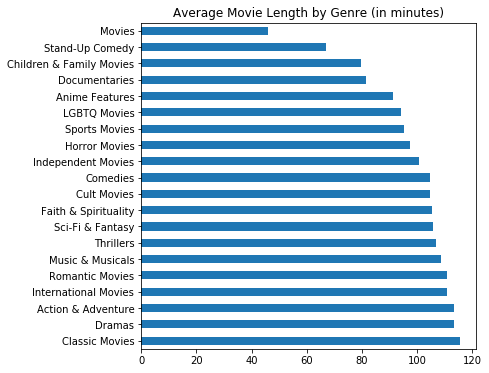

In [62]:
genre_duration.avg_duration.sort_values(ascending=False).plot.barh(figsize=(6,6), title='Average Movie Length by Genre (in minutes)')

In [63]:
# Calculate the number of movies and their average duration for each country.
avg_duration_by_country = {}
for c in countries_list:
    indexes = []
    for i in list(movies.index):
        countries = movies.loc[i, 'country_list']
        if c in countries:
            indexes.append(i)
    subset_df = movies.loc[indexes, :]
    avg_duration = subset_df.duration.mean()
    avg_duration_by_country[c] = avg_duration

country_duration = pd.DataFrame(pd.Series(avg_duration_by_country), columns=['avg_duration'])
country_duration['movie_count'] = country_duration.index.map(movies_by_country)
country_duration.dropna(inplace=True)
country_duration.sort_values(by='avg_duration', inplace=True)
country_duration

,avg_duration,movie_count
Kazakhstan,67.000000,1
Uganda,68.000000,1
Guatemala,68.000000,2
Namibia,69.500000,2
Georgia,71.500000,2
...,...,...
Morocco,137.333333,6
Bahamas,145.000000,1
Soviet Union,156.666667,3
Montenegro,157.000000,1


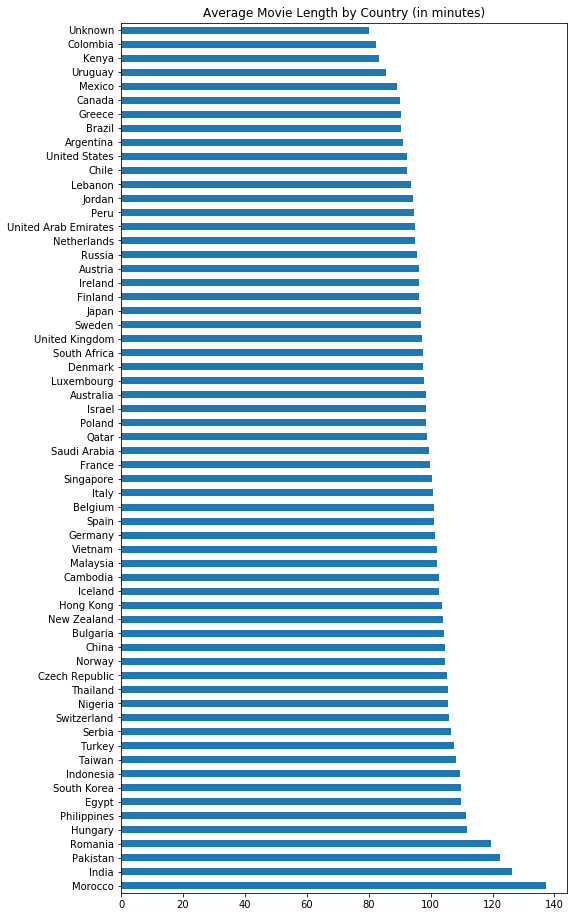

In [64]:
country_duration[country_duration.movie_count >= 5].avg_duration.sort_values(ascending=False).plot.barh(
    figsize=(8,16), title='Average Movie Length by Country (in minutes)')

### 10. TV show tenure by genre.

In [65]:
tv_shows.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,[Unknown],"[João Miguel, Bianca Comparato, Michel Gomes, ...",[Brazil],"[International TV Shows, TV Dramas, TV Sci-Fi ...",1,11,1,3
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,[Serdar Akar],"[Erdal Beşikçioğlu, Yasemin Allen, Melis Birka...",[Turkey],"[International TV Shows, TV Dramas, TV Mysteries]",1,10,1,3


In [66]:
# Frequency distribution of tv shows by number of seasons.
tv_shows.duration.value_counts()

1 Season      1608
2 Seasons      382
3 Seasons      184
4 Seasons       87
5 Seasons       58
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       6
11 Seasons       3
12 Seasons       2
15 Seasons       2
13 Seasons       2
16 Seasons       1
Name: duration, dtype: int64

In [67]:
# Longest tenured tv show on Netflix.
tv_shows[tv_shows.duration == '16 Seasons']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,director_list,cast_list,country_list,listed_in_list,director_size,cast_size,country_size,listed_in_size
show_id,,,,,,,,,,,,,,,,,,,,
s2539,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2020-05-09,2019,TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020.0,[Unknown],"[Ellen Pompeo, Sandra Oh, Katherine Heigl, Jus...",[United States],"[Romantic TV Shows, TV Dramas]",1,15,1,2


In [68]:
# Create a dataframe with the number of tv shows for each genre and length by seasons.
count_by_genre_tv = {}
length_dist_by_genre = {}
for g in genres_list:
    indexes = []
    for i in list(tv_shows.index):
        genres = tv_shows.loc[i, 'listed_in_list']
        if g in genres:
            indexes.append(i)
    subset_df = tv_shows.loc[indexes, :]
    count = len(subset_df)
    length_dist = dict(subset_df.duration.value_counts())
    count_by_genre_tv[g] = count
    length_dist_by_genre[g] = length_dist

tv_genre_season = pd.DataFrame.from_dict(length_dist_by_genre, orient='index')
tv_genre_season_cols = [
    '1 Season',
    '2 Seasons',
    '3 Seasons',
    '4 Seasons',
    '5 Seasons',
    '6 Seasons',
    '7 Seasons',
    '8 Seasons',
    '9 Seasons',
    '10 Seasons',
    '11 Seasons',
    '12 Seasons',
    '13 Seasons',
    '15 Seasons',
    '16 Seasons',
]
tv_genre_season = tv_genre_season.reindex(columns=tv_genre_season_cols)
tv_genre_season['total'] = tv_genre_season.index.map(count_by_genre_tv)
tv_genre_season.fillna(0, inplace=True)
tv_genre_season = tv_genre_season.astype('int')
tv_genre_season.sort_values(by='total', ascending=False, inplace=True)
tv_genre_season

,1 Season,2 Seasons,3 Seasons,4 Seasons,5 Seasons,6 Seasons,7 Seasons,8 Seasons,9 Seasons,10 Seasons,11 Seasons,12 Seasons,13 Seasons,15 Seasons,16 Seasons,total
International TV Shows,940,151,60,23,13,2,4,2,3,0,0,1,0,0,0,1199
TV Dramas,489,81,53,24,20,12,11,6,3,1,1,1,0,1,1,704
TV Comedies,291,99,48,29,19,13,7,9,2,4,2,0,2,0,0,525
Crime TV Shows,295,62,33,9,12,5,3,4,1,0,0,2,0,1,0,427
Kids' TV,205,118,44,27,10,4,0,4,0,2,0,0,0,0,0,414
Docuseries,292,28,20,5,4,2,0,1,1,0,0,0,0,0,0,353
Romantic TV Shows,280,23,13,7,1,3,3,1,1,0,0,0,0,0,1,333
British TV Shows,143,45,19,11,8,1,0,1,2,2,0,0,0,0,0,232
Reality TV,149,44,17,7,1,3,0,1,0,0,0,0,0,0,0,222
Korean TV Shows,124,20,4,1,1,0,0,0,0,0,0,0,0,0,0,150


In [69]:
# Aggregate columns for 4 or more seasons into 1 summary column.
four_plus_seasons = [
    '4 Seasons',
    '5 Seasons',
    '6 Seasons',
    '7 Seasons',
    '8 Seasons',
    '9 Seasons',
    '10 Seasons',
    '11 Seasons',
    '12 Seasons',
    '13 Seasons',
    '15 Seasons',
    '16 Seasons',
]
over_four_season_sum = tv_genre_season[four_plus_seasons].sum(axis=1)
tv_genre_season_pct = tv_genre_season[['1 Season','2 Seasons','3 Seasons']].copy()
tv_genre_season_pct['4+ Seasons'] = over_four_season_sum
tv_genre_season_pct['total'] = tv_genre_season.total
tv_genre_season_pct

,1 Season,2 Seasons,3 Seasons,4+ Seasons,total
International TV Shows,940,151,60,48,1199
TV Dramas,489,81,53,81,704
TV Comedies,291,99,48,87,525
Crime TV Shows,295,62,33,37,427
Kids' TV,205,118,44,47,414
Docuseries,292,28,20,13,353
Romantic TV Shows,280,23,13,17,333
British TV Shows,143,45,19,25,232
Reality TV,149,44,17,12,222
Korean TV Shows,124,20,4,2,150


In [70]:
# Calculate percentages by # of seasons for each genre and add to dataframe.
tgsp_norm_cols = tv_genre_season_pct.columns.tolist()
tgsp_norm_cols.remove('total')
tgsp_norm_cols
for col in tgsp_norm_cols:
    tv_genre_season_pct['{}_pct'.format(col)] = tv_genre_season_pct[col] / tv_genre_season_pct.total * 100

tv_genre_season_pct = tv_genre_season_pct.reindex(columns=[
    '1 Season',
    '1 Season_pct',
    '2 Seasons',
    '2 Seasons_pct',
    '3 Seasons',
    '3 Seasons_pct',
    '4+ Seasons',
    '4+ Seasons_pct',
    'total'
])
tv_genre_season_pct

,1 Season,1 Season_pct,2 Seasons,2 Seasons_pct,3 Seasons,3 Seasons_pct,4+ Seasons,4+ Seasons_pct,total
International TV Shows,940,78.398666,151,12.593828,60,5.004170,48,4.003336,1199
TV Dramas,489,69.460227,81,11.505682,53,7.528409,81,11.505682,704
TV Comedies,291,55.428571,99,18.857143,48,9.142857,87,16.571429,525
Crime TV Shows,295,69.086651,62,14.519906,33,7.728337,37,8.665105,427
Kids' TV,205,49.516908,118,28.502415,44,10.628019,47,11.352657,414
Docuseries,292,82.719547,28,7.932011,20,5.665722,13,3.682720,353
Romantic TV Shows,280,84.084084,23,6.906907,13,3.903904,17,5.105105,333
British TV Shows,143,61.637931,45,19.396552,19,8.189655,25,10.775862,232
Reality TV,149,67.117117,44,19.819820,17,7.657658,12,5.405405,222
Korean TV Shows,124,82.666667,20,13.333333,4,2.666667,2,1.333333,150


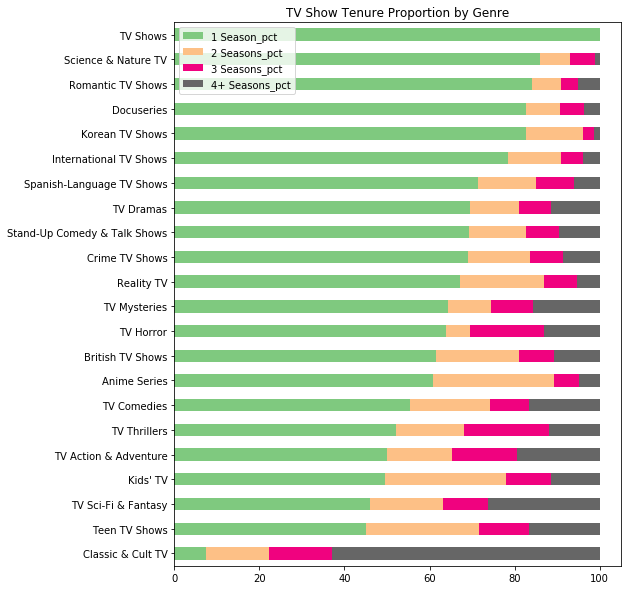

In [71]:
# Graph percentages for each genre using a stacked bar chart.
stacked_bar_cols = ['1 Season_pct','2 Seasons_pct','3 Seasons_pct','4+ Seasons_pct']
tv_genre_season_pct[stacked_bar_cols].sort_values(by='1 Season_pct').plot.barh(
    stacked=True, figsize=(8,10), cmap='Accent', title='TV Show Tenure Proportion by Genre')

### 11. Deeper dive into specific regions (e.g. Africa).

See Netflix_Region_Comparison notebook.

## Analysis: Natural Language Processing

### 12. Most common words in descriptions overall and by genre.

In [72]:
# Import libraries needed for text analysis.
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/antiri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
us_descriptions = netflix[netflix.country == 'United States']
us_descriptions.description

show_id
s4       In a postapocalyptic world, rag-doll robots hi...
s5       A brilliant group of students become card-coun...
s8       After one of his high school students attacks ...
s11      A farmer pens a confession admitting to his wi...
s15      Stranded when the Earth is suddenly destroyed ...
                               ...                        
s7759    Zack and Miri make and star in an adult film t...
s7772    Born without legs and stuck in foster care for...
s7775    A political cartoonist, a crime reporter and a...
s7779    Looking to survive in a world taken over by zo...
s7782    Dragged from civilian life, a former superhero...
Name: description, Length: 2555, dtype: object

In [75]:
# This function uses a vectorizer to determine the most common words and presents that information in a dataframe.
def create_word_distribution(text_series, method, stop_words=None):
    vectorizer = method(stop_words=stop_words)
    text_terms = vectorizer.fit_transform(text_series)
    text_df = pd.DataFrame(text_terms.toarray().T, index=vectorizer.get_feature_names())
    
    if method == CountVectorizer:
        text_df['total'] = text_df.sum(axis=1)
        text_df['document_count'] = (text_df>0).sum(axis=1)
        text_df['overall_document_pct'] = round((text_df>0).sum(axis=1) / len(text_series) * 100, 2)
        text_df.sort_values(by='total', ascending=False, inplace=True)
    elif method == TfidfVectorizer:
        old_cols = list(text_df.columns)
        new_cols = list(text_series.index)
        columns_map = dict(zip(old_cols, new_cols))
        text_df.rename(columns=columns_map, inplace=True)
    
    return text_df

In [76]:
my_stop_words = ['the', 'and', 'to', 'of', 'in', 'an', 'for', 'when', 'as', 'is', 'on', 'by', 'up', 'that', 'who', 'at',
                'into', 'but', 'it', 'from', 'his', 'her', 'this', 'their', 'he', 'she', 'they', 'him', 'with', 'after',
                'about', 'are', 'be', 'them', 'has', 'its', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight',
                'nine', 'ten', '15', '500']

In [77]:
# Most common words appearing in descriptions of US-based shows and movies on Netflix.
create_word_distribution(us_descriptions.description, CountVectorizer, my_stop_words).head(50)

,0,1,2,3,4,5,6,7,8,9,...,2548,2549,2550,2551,2552,2553,2554,total,document_count,overall_document_pct
life,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,267,264,10.37
new,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,256,248,9.75
world,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,164,164,6.46
documentary,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,155,156,6.14
family,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,154,153,6.03
series,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,144,145,5.71
young,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,136,137,5.40
out,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,134,132,5.21
school,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,122,119,4.70
high,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,116,116,4.58


In [78]:
# This function returns the most common words appearing in descriptions for a specific genre.
def identify_top_words_by_genre(df, genre, n_words, stop_words=None):
    indexes = []
    for i in list(df.index):
        genres = df.loc[i, 'listed_in_list']
        if genre in genres:
            indexes.append(i)
    subset_df = df.loc[indexes, :]
    top_words_df = create_word_distribution(subset_df.description, CountVectorizer, stop_words).head(n_words)
    top_words_df['subset_document_pct'] = round(top_words_df.document_count / len(subset_df) * 100, 2)
    top_words_df = top_words_df[['total', 'overall_document_pct', 'subset_document_pct']]
    return top_words_df

identify_top_words_by_genre(us_descriptions, 'Docuseries', 10, my_stop_words)

,total,overall_document_pct,subset_document_pct
series,50,31.90,31.29
docuseries,26,17.18,16.56
world,20,13.50,12.88
documentary,19,12.88,12.27
life,18,12.27,11.66
most,17,11.66,11.04
stories,16,11.04,10.43
how,15,10.43,9.82
history,11,7.98,7.36
food,10,6.13,5.52


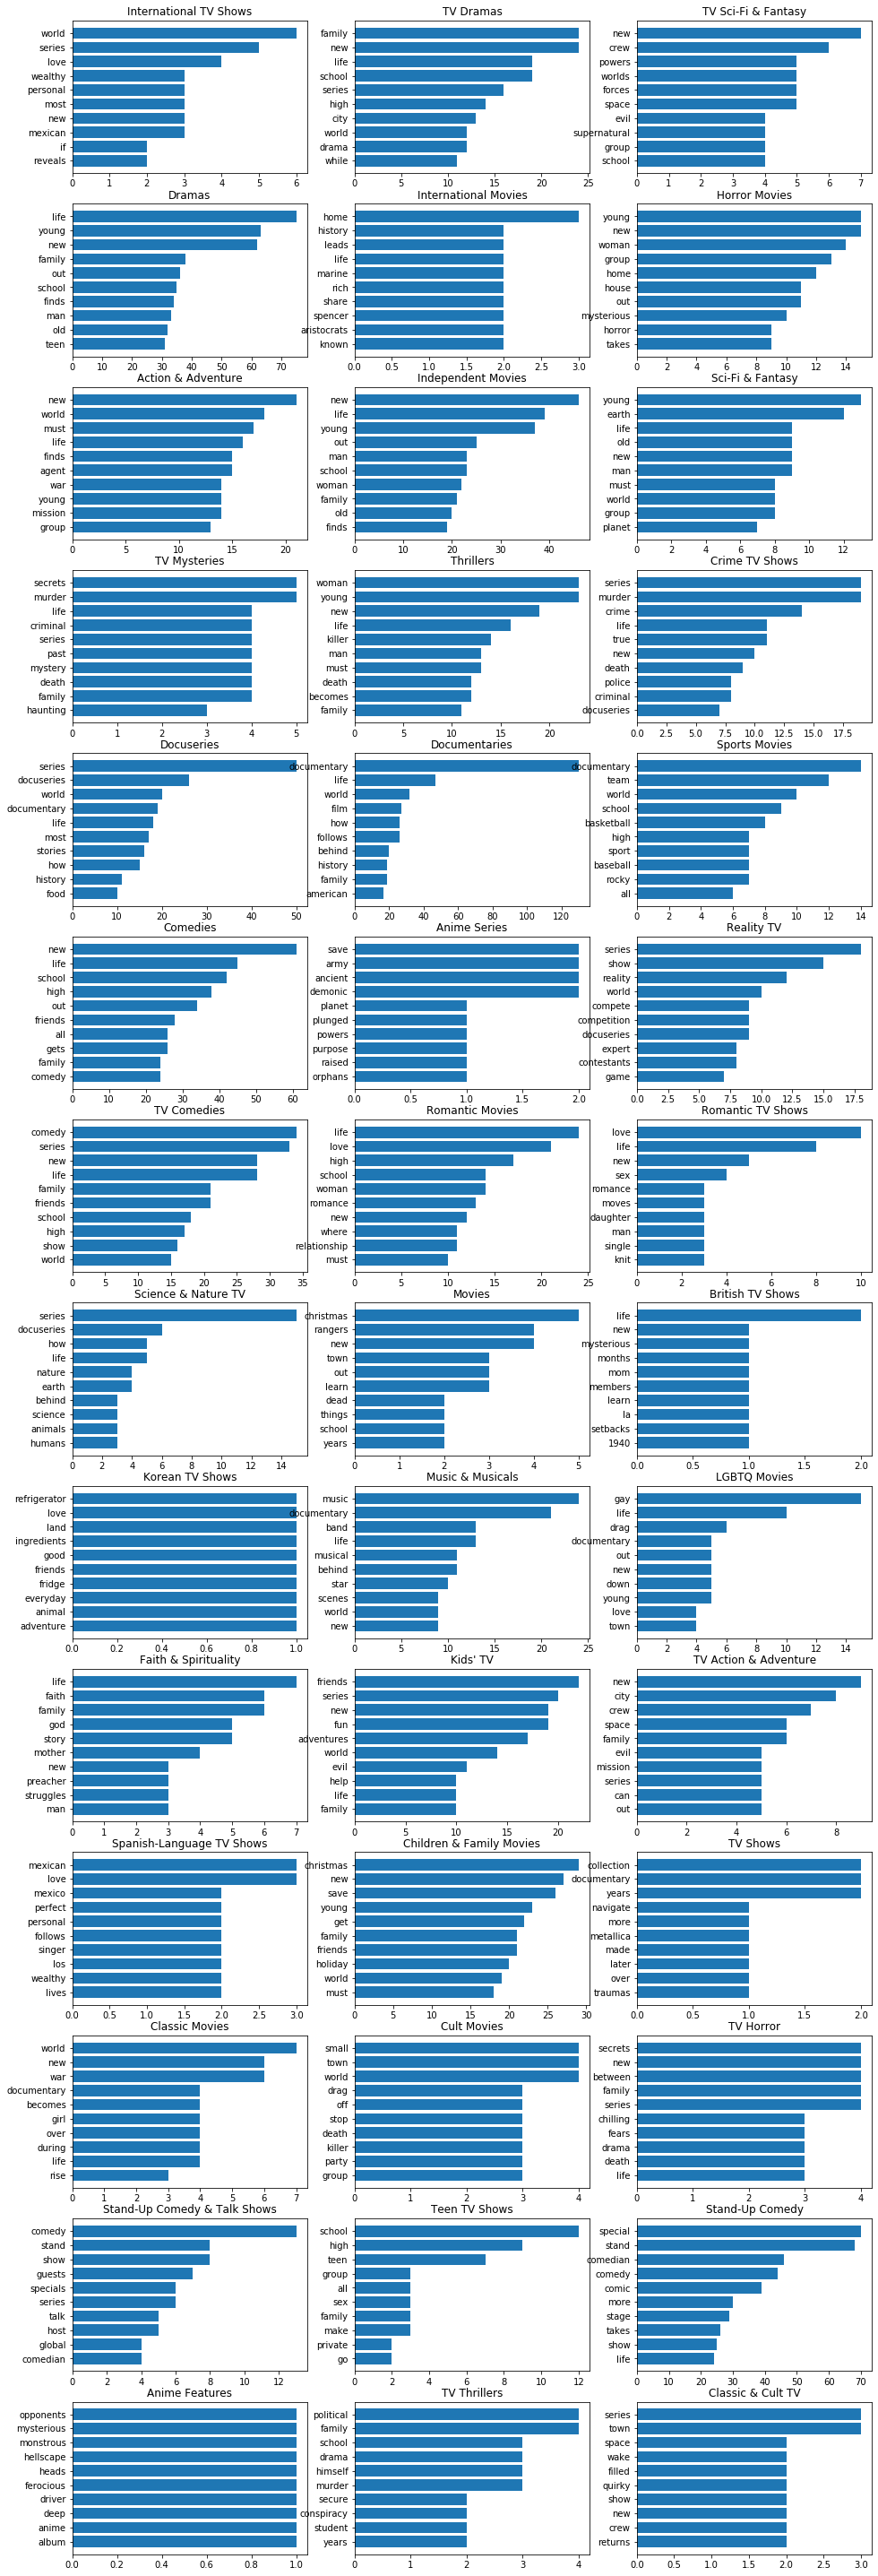

In [79]:
# Top 10 words for each genre.
fig = plt.figure(figsize=(16,52))

for i in range(1, len(genres_list) + 1):
    top_words = identify_top_words_by_genre(us_descriptions, genres_list[i-1], 10, my_stop_words)
    top_words.sort_values(by='total', inplace=True)
    x = top_words.index
    y = top_words.total
    
    ax = fig.add_subplot(len(genres_list)/3, 3, i)
    ax.barh(x, y)
    ax.set_title(genres_list[i-1])

In [ ]:
netflix.to_csv('data/netflix_titles_clean.csv', index=False)
movies.to_csv('data/netflix_movies_clean.csv', index=False)
tv_shows.to_csv('data/netflix_tv_shows_clean.csv', index=False)